In [99]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import re
from utils import get_score_n_best_consecutive, get_score_n_after_peak
import os
from itertools import cycle

sns.reset_orig()
matplotlib.rcParams["figure.dpi"] = 100
plt.rcParams["figure.figsize"] = (8,6)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

### Load data

In [145]:
# (20,20)-(0.4,0.8,0.5)-lr_rec=40
results_l2 = None
results_bp = None
results_ewc = None
results_si = None

if False:
    results = pd.read_csv(os.getcwd() + '/../out/hyperparam_search/search_2022-07-01_16-42-51/search_results.csv', delimiter=';')
    results_bp = pd.read_csv(os.getcwd() + '/../out/hyperparam_search/search_2022-08-14_12-03-40/search_results.csv', delimiter=';')
    results_ewc = pd.read_csv(os.getcwd() + '/../out/hyperparam_search/search_2022-11-03_19-34-01/search_results.csv', delimiter=';')
    results_si = pd.read_csv(os.getcwd() + '/../out/hyperparam_search/search_2022-11-03_19-36-04/search_results.csv', delimiter=';')
    results_l2 = pd.read_csv(os.getcwd() + '/../out/hyperparam_search/search_2022-11-03_19-38-35/search_results.csv', delimiter=';')
    
if False:
    results = pd.read_csv(os.getcwd() + '/../out/hpsearches-final/hpconfig_domain-mnist-sparse-rec/search_results.csv', delimiter=';')
    results_bp = pd.read_csv(os.getcwd() + '/../out/hpsearches-final/hpconfig_domain-split-mnist-bp/search_results.csv', delimiter=';')
    results_ewc = pd.read_csv(os.getcwd() + '/../out/hpsearches-final/hpconfig_domain-split-mnist-ewc/search_results.csv', delimiter=';')
    results_si = pd.read_csv(os.getcwd() + '/../out/hpsearches-final/hpconfig_domain-split-mnist-si/search_results.csv', delimiter=';')
    results_l2 = pd.read_csv(os.getcwd() + '/../out/hpsearches-final/hpconfig_domain-split-mnist-l2/search_results.csv', delimiter=';')



#results_bp_30 = pd.read_csv(os.getcwd() + '/../out/hyperparam_search/search_2022-08-14_12-56-49/search_results.csv', delimiter=';')

# (20,20)-(0.4,0.8,0.5)-lr_rec=40, 10 epochs
#results = pd.read_csv('/home/flaessig/dfc/dfc/out/hyperparam_search/search_2022-08-12_12-12-01/search_results.csv', delimiter=';')
#results_bp = pd.read_csv('/home/flaessig/dfc/dfc/out/hyperparam_search/search_2022-08-15_10-53-20/search_results.csv', delimiter=';')

# (20,20)-(0.4,0.8,0.5)-lr_rec=40, shuffled
#results = pd.read_csv('/home/flaessig/dfc/dfc/out/hyperparam_search/search_2022-08-12_15-26-31/search_results.csv', delimiter=';')
#results_bp = pd.read_csv('/home/flaessig/dfc/dfc/out/hyperparam_search/search_2022-08-14_14-53-26/search_results.csv', delimiter=';')

# (20,20)-(0.4,0.8,0.5)-lr_rec=40, inference recurrence
#results = results.append(pd.read_csv(os.getcwd() + '/../out/hyperparam_search/search_2022-07-08_18-54-28/search_results.csv', delimiter=';'))

# class (20,20)-(0.2,0.8,0)-lr_rec=40
if False:
    results = pd.read_csv(os.getcwd() + '/../out/hyperparam_search/search_2022-07-09_09-07-29/search_results.csv', delimiter=';')
    results_bp = pd.read_csv(os.getcwd() + '/../out/hyperparam_search/search_2022-08-28_13-43-46/search_results.csv', delimiter=';')
    results_bp = pd.read_csv(os.getcwd() + '/../out/hyperparam_search/search_2022-08-24_16-20-15/search_results.csv', delimiter=';')
    results_ewc = pd.read_csv(os.getcwd() + '/../out/hyperparam_search/search_2022-10-26_08-36-55/search_results.csv', delimiter=';')
    results_si = pd.read_csv(os.getcwd() + '/../out/hyperparam_search/search_2022-10-27_04-46-32/search_results.csv', delimiter=';')

if True:
    results = pd.read_csv(os.getcwd() + '/../out/hpsearches-final/hpconfig_class-mnist-sparse-rec/search_results.csv', delimiter=';')
    results_bp = pd.read_csv(os.getcwd() + '/../out/hpsearches-final/hpconfig_class-split-mnist-bp/search_results.csv', delimiter=';')
    results_ewc = pd.read_csv(os.getcwd() + '/../out/hpsearches-final/hpconfig_class-split-mnist-ewc/search_results.csv', delimiter=';')
    results_si = pd.read_csv(os.getcwd() + '/../out/hpsearches-final/hpconfig_class-split-mnist-si/search_results.csv', delimiter=';')
    
if False:
    results = pd.read_csv(os.getcwd() + '/../out/hpsearches-final/hpconfig_class-mnist-sparse-rec-all-variants/search_results.csv', delimiter=';')

# permuted (50,50)-(0,0.3,0/0,0.6,0) lr_rec search
#results = pd.read_csv('/home/flaessig/dfc/dfc/out/hyperparam_search/search_2022-07-03_12-24-16/search_results.csv', delimiter=';')

# class (20,20)-(0.4,0.8,0), searching over block/freeze fw weights
#results = pd.read_csv('/home/flaessig/dfc/dfc/out/hyperparam_search/search_2022-07-05_12-30-02/search_results.csv', delimiter=';')

# class bigger sizes search
#results = pd.read_csv('/home/flaessig/dfc/dfc/out/hyperparam_search/search_2022-07-06_11-32-09/search_results.csv', delimiter=';')
#results = results.append(pd.read_csv('/home/flaessig/dfc/dfc/out/hyperparam_search/search_2022-07-06_15-51-33/search_results.csv', delimiter=';'))

# big search class: hidden_sizes=20,20/50,50/100,100, lr_rec=[0, 10, 20, 40, 80], rec_adaptation=-1, use_recurrent_weights=True/False (delete?)
#results = pd.read_csv('/home/flaessig/dfc/dfc/out/hyperparam_search/search_2022-06-15_12-10-36/search_results.csv', delimiter=';')

# big search permuted domain: hidden_sizes=400,400, lr_rec=[0, 10, 40, 80], rec_adaptation=-1, use_recurrent_weights=True/False (delete?)
#results = pd.read_csv('/home/flaessig/dfc/dfc/out/hyperparam_search/search_2022-06-19_11-52-20/search_results.csv', delimiter=';')

# min accu sweep domain
#results = pd.read_csv('/home/flaessig/dfc/dfc/out/hyperparam_search/search_2022-08-09_17-38-23/search_results.csv', delimiter=';')
#  zoomed
if False:
    results = pd.read_csv(os.getcwd() + '/../out/hyperparam_search/search_2022-08-13_17-55-03/search_results.csv', delimiter=';')
    results_bp = pd.read_csv(os.getcwd() + '/../out/hyperparam_search/search_2022-08-14_14-42-16/search_results.csv', delimiter=';')
    results_ewc = pd.read_csv(os.getcwd() + '/../out/hyperparam_search/search_2022-10-27_13-57-25/search_results.csv', delimiter=';')
    results_si = pd.read_csv(os.getcwd() + '/../out/hyperparam_search/search_2022-10-27_10-43-08/search_results.csv', delimiter=';')

if False:
    results = pd.read_csv(os.getcwd() + '/../out/hpsearches-final/hpconfig_domain-mnist-sparse-rec-min-accu/search_results.csv', delimiter=';')
    results_bp = pd.read_csv(os.getcwd() + '/../out/hpsearches-final/hpconfig_domain-split-mnist-bp-min-accu/search_results.csv', delimiter=';')
    results_ewc = pd.read_csv(os.getcwd() + '/../out/hpsearches-final/hpconfig_domain-split-mnist-ewc-min-accu/search_results.csv', delimiter=';')
    results_si = pd.read_csv(os.getcwd() + '/../out/hpsearches-final/hpconfig_domain-split-mnist-si-min-accu/search_results.csv', delimiter=';')

# min accu sweep class
if False:
    results = pd.read_csv(os.getcwd() + '/../out/hyperparam_search/search_2022-10-27_17-19-10/search_results.csv', delimiter=';')
    results_bp = pd.read_csv(os.getcwd() + '/../out/hyperparam_search/search_2022-10-27_17-12-54/search_results.csv', delimiter=';')
    results_ewc = pd.read_csv(os.getcwd() + '/../out/hyperparam_search/search_2022-10-27_17-28-37/search_results.csv', delimiter=';')
    results_si = pd.read_csv(os.getcwd() + '/../out/hyperparam_search/search_2022-10-27_17-10-10/search_results.csv', delimiter=';')

if False:
    results = pd.read_csv(os.getcwd() + '/../out/hpsearches-final/hpconfig_class-mnist-sparse-rec-min-accu/search_results.csv', delimiter=';')
    results_bp = pd.read_csv(os.getcwd() + '/../out/hpsearches-final/hpconfig_class-split-mnist-bp-min-accu/search_results.csv', delimiter=';')
    results_ewc = pd.read_csv(os.getcwd() + '/../out/hpsearches-final/hpconfig_class-split-mnist-ewc-min-accu/search_results.csv', delimiter=';')
    results_si = pd.read_csv(os.getcwd() + '/../out/hpsearches-final/hpconfig_class-split-mnist-si-min-accu/search_results.csv', delimiter=';')


# (20,20)-(0.4,0.8,0.5), lr_rec search
#results = pd.read_csv(os.getcwd() + '/../out/hyperparam_search/search_2022-08-15_17-43-47/search_results.csv', delimiter=';')
# lr_rec=40
#results = results.append(pd.read_csv(os.getcwd() + '/../out/hyperparam_search/search_2022-07-01_16-42-51/search_results.csv', delimiter=';'))
# lr_rec=1000
#results = results.append(pd.read_csv(os.getcwd() + '/../out/hyperparam_search/search_2022-09-06_10-41-07/search_results.csv', delimiter=';'))

# (20,20)-(0.4,0.8,0.5), clamp_step sparsity, no recurrent weights -> bad
#results = pd.read_csv('/home/flaessig/dfc/dfc/out/hyperparam_search/search_2022-08-18_17-46-53/search_results.csv', delimiter=';')

# (20,20)-(0.4,0.8,0.5), necessity tests for rec_grad_normalization, fw_grad_normalization,
# freeze_suppressed_neuron_weights, rec_learning_neurons, sparsity_level_function parameters
#results = pd.read_csv(os.getcwd() + '/../out/hyperparam_search/search_2022-08-19_17-59-36/search_results.csv', delimiter=';')
# double-KO of fw_grad_normalization, freeze_suppressed_neuron_weights
#results = results.append(pd.read_csv(os.getcwd() + '/../out/hyperparam_search/search_2022-08-21_16-57-43/search_results.csv', delimiter=';'))
# turned off recurrent activation renormalization
#results = results.append(pd.read_csv(os.getcwd() + '/../out/hyperparam_search/search_2022-09-07_14-21-40/search_results.csv', delimiter=';'))


# hebbian fw learning
#results = results.append(pd.read_csv(os.getcwd() + '/../out/hyperparam_search/search_2022-09-23_16-12-39/search_results.csv', delimiter=';'))
## hebbian fw learning, (0.8,0.8,0.5)
#results = results.append(pd.read_csv(os.getcwd() + '/../out/hyperparam_search/search_2022-09-27_14-54-50/search_results.csv', delimiter=';'))

# mnist hebbian fw
#results = pd.read_csv(os.getcwd() + '/../out/hyperparam_search/search_2022-09-27_17-30-53/search_results.csv', delimiter=';')

# (20,20)-(0.4,0.8,0.5) relu-sigmoid
#results = results.append(pd.read_csv(os.getcwd() + '/../out/hyperparam_search/search_2022-10-06_15-24-04/search_results.csv', delimiter=';'))
#results_bp = results_bp.append(pd.read_csv(os.getcwd() + '/../out/hyperparam_search/search_2022-10-06_18-14-56/search_results.csv', delimiter=';'))
# (20,20)-(0.2,0.5,0.5) sigmoid
#results = results.append(pd.read_csv(os.getcwd() + '/../out/hyperparam_search/search_2022-10-12_15-53-43/search_results.csv', delimiter=';'))
# (40,40)-(0.4,0.8,0.5) sigmoid
#results = results.append(pd.read_csv(os.getcwd() + '/../out/hyperparam_search/search_2022-10-12_17-21-58/search_results.csv', delimiter=';'))


# sigmoid, no fw norm
#results = results.append(pd.read_csv(os.getcwd() + '/../out/hyperparam_search/search_2022-10-12_13-29-50/search_results.csv', delimiter=';'))

# sigmoid no inactive neuron fw weight update freeze
#results = results.append(pd.read_csv(os.getcwd() + '/../out/hyperparam_search/search_2022-10-12_16-03-20/search_results.csv', delimiter=';'))

# from_fw_learning
#results = (pd.read_csv(os.getcwd() + '/../out/hyperparam_search/search_2022-10-17_13-24-04/search_results.csv', delimiter=';'))

# pure ff sparse population select
#results = results.append(pd.read_csv(os.getcwd() + '/../out/hyperparam_search/search_2022-10-18_10-34-39/search_results.csv', delimiter=';'))

In [146]:
#results = pd.read_csv(os.getcwd() + '/../out/hpsearches-final/hpconfig_domain-mnist-sparse-rec/search_results.csv', delimiter=';')
#results = results.append(pd.read_csv(os.getcwd() + '/../out/hpsearches-final/hpconfig_domain-mnist-sparse-rec-no-bias/search_results.csv', delimiter=';'))

#results = pd.read_csv(os.getcwd() + '/../out/hpsearches-final/hpconfig_class-mnist-sparse-rec/search_results.csv', delimiter=';')
#results = results.append(pd.read_csv(os.getcwd() + '/../out/hpsearches-final/hpconfig_class-mnist-sparse-rec-no-bias/search_results.csv', delimiter=';'))




### Preprocessing

In [147]:
interesting_cols = [
    'task_test_accu_last',
    'task_train_accu_last',
    'lr',
    'use_recurrent_weights',
    'lr_rec',
    'layer_max_sparsities',
    'size_hidden',
    'freeze_suppressed_neuron_weights',
    'maintain_total_activity',
    'rec_grad_normalization',
    'fw_grad_normalization',
    'rec_learning_neurons',
    'rec_adaptation',
    'random_seed',
    'permanent_sparsification',
    'block_non_sparsified_neurons',
    'rec_inference_iterations',
    'stop_early_at_accu',
    'sparsity_level_function',
    'turn_off_rec_norm_normalization',
    'hebbian_fw_learning',
    'hidden_activation',
    'from_ff_learning',
    'frac_rec_deciding_sparsity',
    'network_type',
    'reg_coef',
    'no_bias'
    
]

interesting_cols_normal = results.columns[results.columns.isin(interesting_cols)]

if results_bp is not None:
    interesting_cols_bp = results_bp.columns[results_bp.columns.isin(interesting_cols)]

if results_ewc is not None:
    interesting_cols_ewc = results_ewc.columns[results_ewc.columns.isin(interesting_cols)]

if results_si is not None:
    interesting_cols_si = results_si.columns[results_si.columns.isin(interesting_cols)]
if results_l2 is not None:
    interesting_cols_l2 = results_l2.columns[results_l2.columns.isin(interesting_cols)]

In [148]:
epochs = 4
results = results.sort_values(by='task_test_accu_last', ascending=False)[interesting_cols_normal]

if results_bp is not None:
    results_bp = results_bp.sort_values(by='task_test_accu_last', ascending=False)[interesting_cols_bp]

if results_ewc is not None:
    results_ewc = results_ewc.sort_values(by='task_test_accu_last', ascending=False)[interesting_cols_ewc]

if results_si is not None:
    results_si = results_si.sort_values(by='task_test_accu_last', ascending=False)[interesting_cols_si]

if results_l2 is not None:
    results_l2 = results_l2.sort_values(by='task_test_accu_last', ascending=False)[interesting_cols_l2]



#results_bp_30 = results_bp_30.sort_values(by='task_test_accu_last', ascending=False)[interesting_cols_bp]

In [149]:
# bp result analysis
#results.groupby(["size_hidden", "lr", "layer_max_sparsities", "lr_rec", "rec_inference_iterations"]).mean()['task_test_accu_last']

In [150]:
no_sparsity = re.sub('[^0,]', '', results.iloc[0]['layer_max_sparsities'])
size = results.iloc[1]['size_hidden']
shuffle_tasks = 'shuffle_tasks' in results.columns


### Create column for comparisons
results['mode'] = ""
results['mode'] = results['mode'].astype(str)

# Non-sparse, non-recurrent runs
mask = (~results['use_recurrent_weights']) & (results['layer_max_sparsities'] == no_sparsity)
results.loc[mask, 'mode'] = 'dfc-standard'

# Sparse, non-recurrent runs
mask = (~results['use_recurrent_weights']) & (results['layer_max_sparsities'] != no_sparsity)
results.loc[mask, 'mode'] = 'dfc-sparse'

# Non-sparse, recurrent runs
mask = (results['use_recurrent_weights']) & (results['layer_max_sparsities'] == no_sparsity)
results.loc[mask, 'mode'] = 'dfc-rec'

# Sparse and recurrent runs, distinguishing lr_rec  values
mask = (results['use_recurrent_weights']) & (results['layer_max_sparsities'] != no_sparsity)
results.loc[mask, 'mode'] = 'dfc-sparse-rec'
#results.loc[mask, 'mode'] = 'dfc-sparse-rec-lr_rec=' + results[mask]['lr_rec'].astype(str)

# forced sparsity runs (blocking most active neurons from previous task in last layer)
if 'block_non_sparsified_neurons' in results.columns:
    mask = results['block_non_sparsified_neurons']
    results.loc[mask, 'mode'] = results.loc[mask, 'mode'] + '-blocked'

"""if 'rec_inference_iterations' in results.columns:
    mask = results['rec_inference_iterations'] > 0
    results.loc[mask, 'mode'] = results.loc[mask, 'mode'] + '-rec-inf-' + results.loc[mask, 'rec_inference_iterations'].astype(str)"""

# Sparse and recurrent runs, distinguishing lr_rec  values
mask = (~results['freeze_suppressed_neuron_weights'] & (results['layer_max_sparsities'] != no_sparsity))
results.loc[mask, 'mode'] = results.loc[mask, 'mode'] + '-no-freeze'

# 20,4 sanity check
if 'permanent_sparsification' in results.columns:
    mask = results['permanent_sparsification']
else:
    mask = (results['size_hidden'] == "20,4")
results.loc[mask, 'mode'] = 'permanent-sparsification'

if 'hebbian_fw_learning' in results.columns:
    mask = results['hebbian_fw_learning'] == True
    results.loc[mask, 'mode'] = 'hebbian-fw-learning'
    
if 'from_ff_learning' in results.columns:
    mask = results['from_ff_learning'] == True
    results.loc[mask, 'mode'] = 'from_ff_learning'


mask = ((results['fw_grad_normalization'] != 'incoming') & (results['layer_max_sparsities'] != no_sparsity))
results.loc[mask, 'mode'] = results.loc[mask, 'mode'] + "-no-fw-norm"




"""# necessity checks
mask = results['rec_grad_normalization'] != 'incoming'
results.loc[mask, 'mode'] = 'rec_grad_normalization-KO'

mask = results['fw_grad_normalization'] != 'incoming'
results.loc[mask, 'mode'] = 'fw_grad_normalization-KO'

mask = results['freeze_suppressed_neuron_weights'] == False
results.loc[mask, 'mode'] = 'freeze_suppressed_neuron_weights-KO'

mask = results['rec_learning_neurons'] == 'all'
results.loc[mask, 'mode'] = 'rec_learning_neurons-all'

if 'sparsity_level_function' in results.columns:
    mask = results['sparsity_level_function'] == 'constant'
    results.loc[mask, 'mode'] = 'sparsity_level_function-constant'

mask = (results['fw_grad_normalization'] != 'incoming') & (results['freeze_suppressed_neuron_weights'] == False)
results.loc[mask, 'mode'] = 'double-KO'

if 'turn_off_rec_norm_normalization' in results.columns:
    mask = results['turn_off_rec_norm_normalization'] == True
    results.loc[mask, 'mode'] = results.loc[mask, 'mode'] + '-renorm-off'"""


# BP

if results_bp is not None:
    results_bp['mode'] = 'bp'
    results = results.append(results_bp)

# EWC
if results_ewc is not None:
    results_ewc['mode'] = 'ewc-' + results_ewc['reg_coef'].astype(str)
    results = results.append(results_ewc)

# L2
if results_l2 is not None:
    results_l2['mode'] = 'l2-' + results_l2['reg_coef'].astype(str)
    results = results.append(results_l2)


# SI
if results_si is not None:
    results_si['mode'] = 'si-' + results_si['reg_coef'].astype(str)
    results = results.append(results_si)

"""if 'hidden_activation' in results.columns:
    results.loc[:, 'mode'] = results.loc[:, 'mode'] + "-" + results.loc[:, 'hidden_activation']
    results_bp.loc[:, 'mode'] = results_bp.loc[:, 'mode'] + "-" + results_bp.loc[:, 'hidden_activation']"""

if 'frac_rec_deciding_sparsity' in results.columns:
    results.loc[results.loc[:, 'frac_rec_deciding_sparsity'] == 0, 'mode'] = results.loc[results.loc[:, 'frac_rec_deciding_sparsity'] == 0, 'mode'] + "_ff-sparsity-selection"


if 'no_bias' in results.columns:
    mask = results['no_bias'] == True
    results.loc[mask, 'mode'] = 'dfc-sparse-rec-no-bias'

"""results_bp_30['mode'] = 'bp-30'
results = results.append(results_bp_30)"""

/var/folders/99/scv9lj4s4vgdsc2mp350clcc0000gn/T/ipykernel_13841/3786460259.py:91: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append(results_bp)
/var/folders/99/scv9lj4s4vgdsc2mp350clcc0000gn/T/ipykernel_13841/3786460259.py:96: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append(results_ewc)
/var/folders/99/scv9lj4s4vgdsc2mp350clcc0000gn/T/ipykernel_13841/3786460259.py:107: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append(results_si)


"results_bp_30['mode'] = 'bp-30'\nresults = results.append(results_bp_30)"

### All

In [151]:
results

,task_test_accu_last,task_train_accu_last,freeze_suppressed_neuron_weights,fw_grad_normalization,hidden_activation,layer_max_sparsities,lr,lr_rec,maintain_total_activity,permanent_sparsification,random_seed,rec_adaptation,rec_grad_normalization,rec_inference_iterations,rec_learning_neurons,size_hidden,use_recurrent_weights,mode,reg_coef
45,0.6599,0.653250,True,incoming,tanh,"0.2,0.8,0",0.000100,40.0,False,False,3,-1.0,incoming,0.0,suppressed_only,"200,200",True,dfc-sparse-rec,NaN
46,0.6295,0.619917,True,incoming,tanh,"0.2,0.8,0",0.000032,40.0,False,False,2,-1.0,incoming,0.0,suppressed_only,"200,200",True,dfc-sparse-rec,NaN
49,0.5666,0.550017,True,incoming,tanh,"0.2,0.8,0",0.000032,40.0,False,False,3,-1.0,incoming,0.0,suppressed_only,"200,200",True,dfc-sparse-rec,NaN
25,0.5505,0.543033,True,incoming,tanh,"0.2,0.8,0",0.000100,40.0,False,False,1,-1.0,incoming,0.0,suppressed_only,"200,200",True,dfc-sparse-rec,NaN
12,0.5410,0.538183,True,incoming,tanh,"0.2,0.8,0",0.000032,40.0,False,False,5,-1.0,incoming,0.0,suppressed_only,"200,200",True,dfc-sparse-rec,NaN
34,0.5320,0.535600,True,incoming,tanh,"0.2,0.8,0",0.000100,40.0,False,False,2,-1.0,incoming,0.0,suppressed_only,"200,200",True,dfc-sparse-rec,NaN
21,0.5150,0.506133,True,incoming,tanh,"0.2,0.8,0",0.000032,40.0,False,False,1,-1.0,incoming,0.0,suppressed_only,"200,200",True,dfc-sparse-rec,NaN
16,0.4770,0.474417,True,incoming,tanh,"0.2,0.8,0",0.000032,40.0,False,False,4,-1.0,incoming,0.0,suppressed_only,"200,200",True,dfc-sparse-rec,NaN
30,0.4083,0.408350,True,incoming,tanh,"0.2,0.8,0",0.000100,40.0,False,False,5,-1.0,incoming,0.0,suppressed_only,"200,200",True,dfc-sparse-rec,NaN
52,0.4057,0.397717,True,incoming,tanh,"0.2,0.8,0",0.003162,40.0,False,False,4,-1.0,incoming,0.0,suppressed_only,"200,200",True,dfc-sparse-rec,NaN


### Grouped

In [152]:
lines = [":", "-","--","-."]
lines=["-"]
linecycler = cycle(lines)
line_fmt='-o'
markersize=5
capsize=5
red_mode = 'dfc-sparse-rec-no-bias'

/var/folders/99/scv9lj4s4vgdsc2mp350clcc0000gn/T/ipykernel_13841/1611900219.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_results['lr'] = selected_results['lr'].astype(float)
/var/folders/99/scv9lj4s4vgdsc2mp350clcc0000gn/T/ipykernel_13841/1611900219.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_results['lr'] = selected_results['lr'].astype(float)
/var/folders/99/scv9lj4s4vgdsc2mp350clcc0000gn/T/ipykernel_13841/1611900219.py:43: SettingWithCopyWarning: 
A value is trying to b

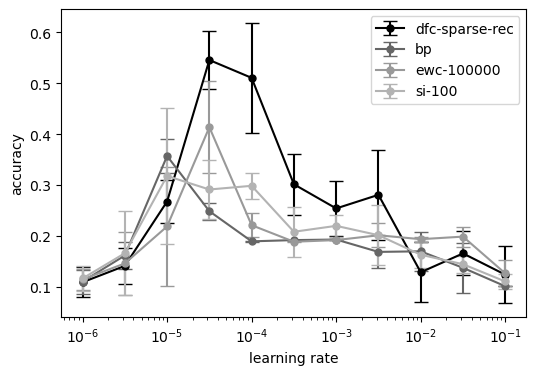

In [157]:
plt.rcParams["figure.figsize"] = (6,4)

### dfc varieties
#modes_to_plot = ['dfc-sparse-rec', 'dfc-sparse-rec-no-bias']
#modes_to_plot = ['dfc-standard', 'dfc-rec', 'dfc-sparse', 'dfc-sparse-rec']
#modes_to_plot = ['dfc-sparse', 'dfc-sparse-rec']

modes_to_plot = ['dfc-sparse-rec', 'bp', 'ewc-100000', 'si-100']

### lr
#modes_to_plot = ['bp', 'dfc-sparse-rec-lr_rec=0.0', 'dfc-sparse-rec-lr_rec=0.1', 'dfc-sparse-rec-lr_rec=10.0', 'dfc-sparse-rec-lr_rec=40.0', 'dfc-sparse-rec-lr_rec=100.0', 'dfc-sparse-rec-lr_rec=1000.0']

### necessity
#modes_to_plot = ['dfc-sparse-rec', 'rec_grad_normalization-KO', 'fw_grad_normalization-KO', 'freeze_suppressed_neuron_weights-KO', 'rec_learning_neurons-all', 'sparsity_level_function-constant']
#modes_to_plot = ['dfc-sparse-rec', 'double-KO']
#modes_to_plot = ['dfc-sparse-rec', 'dfc-sparse-rec-renorm-off', 'rec_grad_normalization-KO', 'rec_grad_normalization-KO-renorm-off', 'double-KO']
#modes_to_plot = ['dfc-sparse-rec', 'bp', 'double-KO', 'freeze_suppressed_neuron_weights-KO', 'fw_grad_normalization-KO']

#modes_to_plot = ['dfc-sparse-rec', 'dfc-sparse', 'dfc-sparse-rec_ff-sparsity-selection', 'dfc-sparse_ff-sparsity-selection']

not_groupby_cols = ['task_test_accu_last', 'random_seed', 'lr_rec', 'task_train_accu_last',
                    'rec_learning_neurons', 'rec_grad_normalization', 'permanent-sparsification',
                    'rec_inference_iterations', 'fw_grad_normalization', 'turn_off_rec_norm_normalization',
                    'hebbian_fw_learning', 'sparsity_level_function', 'frac_rec_deciding_sparsity', 'from_ff_learning',
                   'block_non_sparsified_neurons', 'network_type', 'reg_coef', 'stop_early_at_accu', 'no_bias']

size = "20,20"


x_axis_value = 'lr'
#x_axis_value = 'stop_early_at_accu'

metric_type = "test"
groupby_cols = [x for x in interesting_cols if x not in not_groupby_cols]

plotted_curves = []
for mode in modes_to_plot:
    
    selected_results = results[
            (results['mode'] == mode)
        ]
    
    selected_results['lr'] = selected_results['lr'].astype(float)

    
    if mode.startswith('bp'):
        group_by_cols_curr = [x for x in groupby_cols if x in results_bp.columns]
    elif mode.startswith('ewc'):
        group_by_cols_curr = [x for x in groupby_cols if x in results_ewc.columns]
    elif mode.startswith('si'):
        group_by_cols_curr = [x for x in groupby_cols if x in results_si.columns]
    elif mode.startswith('l2'):
        group_by_cols_curr = [x for x in groupby_cols if x in results_l2.columns]
    else:
        group_by_cols_curr = groupby_cols
        

    grouped = selected_results.groupby(by=group_by_cols_curr)
    means = grouped.mean().reset_index()


    stds = grouped.std().reset_index()
    plt.errorbar(means[x_axis_value], means[f'task_{metric_type}_accu_last'],
                 yerr=stds[f'task_{metric_type}_accu_last'], label=mode, fmt=line_fmt, markersize=markersize, capsize=capsize,
                        color=('red' if mode==red_mode else None))
    
    plotted_curves.append((means[f'task_{metric_type}_accu_last'], stds[f'task_{metric_type}_accu_last'], mode))

plt.style.use('grayscale')
plt.gcf().patch.set_facecolor('white')
plt.legend()
evaluation_range = (10**(-4), 10**(-2))
#plt.axvspan(evaluation_range[0], evaluation_range[1], facecolor='green', alpha=0.1)
plt.ylabel('accuracy')

if x_axis_value == 'lr':
    plt.xscale('log')
    plt.xlabel('learning rate')
    #plt.xlim(1 / 10**(5.6),1 / 10**(1.9))
else:
    plt.xlabel('stop_early_at_accu')
#plt.title(f'hidden_sizes={size}, {shuffle_tasks=}, {epochs=}')



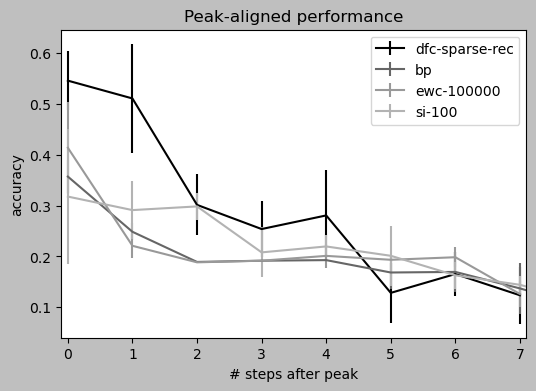

In [158]:
min_length = 999
for means, stds, mode in plotted_curves:
    max_idx = np.argmax(means)
    len_after_peak = len(means[max_idx:])
    plt.errorbar(range(len_after_peak), means[max_idx:],
                 yerr=stds[max_idx:], label=mode)
    min_length = min(len_after_peak, min_length)
plt.xlim(-0.1, min_length - 0.9)
plt.xlabel('# steps after peak')
plt.ylabel('accuracy')
plt.title('Peak-aligned performance')
plt.legend()

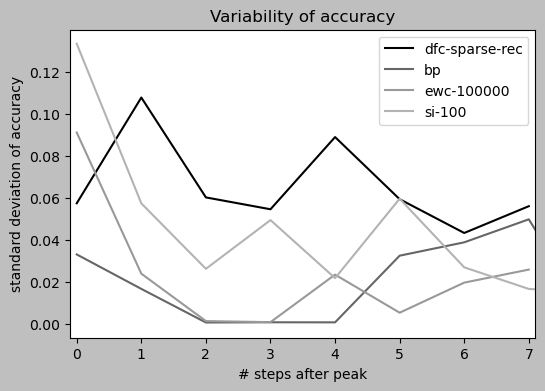

In [159]:
min_length = 999
for means, stds, mode in plotted_curves:
    max_idx = np.argmax(means)
    len_after_peak = len(means[max_idx:])
    plt.plot(range(len_after_peak), stds[max_idx:], label=mode)
    min_length = min(len_after_peak, min_length)
plt.xlim(-0.1, min_length - 0.9)
plt.xlabel('# steps after peak')
plt.ylabel('standard deviation of accuracy')
plt.title('Variability of accuracy')
plt.legend()

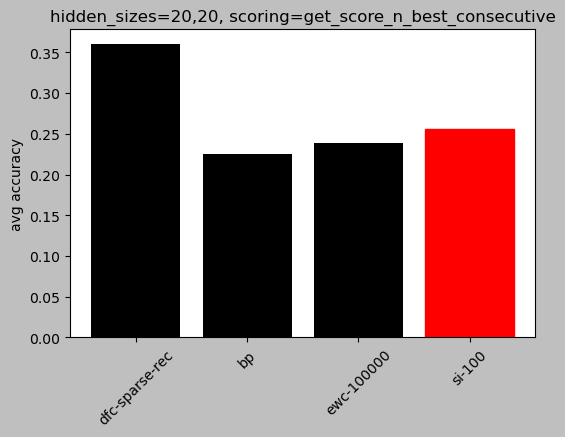

In [160]:
dynamic_eval_range = True
nr_lr_intervals_to_eval = 6  # only used if `dynamic_eval_range == True`
score_func = get_score_n_after_peak
score_func = get_score_n_best_consecutive
#modes_to_plot = ['bp', 'rec_learning_neurons-all']

means = []
for mode in modes_to_plot:
    
    if dynamic_eval_range:
        score, _ = score_func(results[
                    #(results['size_hidden'] == size) &
                    (results['mode'] == mode)], nr_lr_intervals_to_eval, f'task_{metric_type}_accu_last')
        means.append(score)
    else:
    
        selected_results = results[
                    #(results['size_hidden'] == size) &
                    (results['mode'] == mode) &
                    ((results['lr'] >= evaluation_range[0]) 
                     & (results['lr'] <= evaluation_range[1]))
                ]

        means.append(selected_results.drop(columns=['mode'])[f'task_{metric_type}_accu_last'].mean())

barlist = plt.bar(modes_to_plot, means)
plt.xticks(rotation = 45)
#plt.ylim(0.6, None)
plt.title(f"hidden_sizes={size}, scoring={score_func.__name__}")
plt.ylabel('avg accuracy')
for i in range(1, 2):
    barlist[-i].set_color('r')

In [161]:
print(means)

[0.3600466666666666, 0.22464333333333333, 0.23911333333333332, 0.25609666666666664]


In [86]:
### lr_rec sweep
means = []
stds = []
lr_recs = [0.0, 0.1, 1.0, 10.0, 40.0, 100.0, 1000.0]
modes_to_plot = [f"dfc-sparse-rec-lr_rec={lr_rec}" for lr_rec in lr_recs]
for mode in modes_to_plot:

    mean, std = score_func(results[
                #(results['size_hidden'] == size) &
                (results['mode'] == mode)], nr_lr_intervals_to_eval, f'task_{metric_type}_accu_last')
    means.append(mean)
    stds.append(std)

Text(0, 0.5, 'window-averaged accuracy')

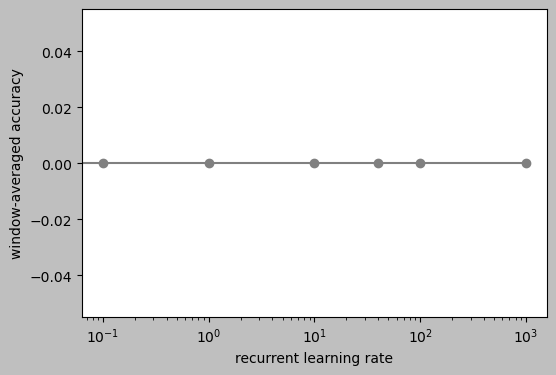

In [87]:
plt.errorbar(lr_recs, means, yerr=stds, color='grey', fmt='-o', capsize=5)
plt.xscale('log')
plt.xlabel('recurrent learning rate')
plt.ylabel('window-averaged accuracy')